In [ ]:
# White Blood Cell Segmentation

Objective: Segment white blood cell nucleus and cytoplasm using:

- K-means clustering (Hard clustering)
- Fuzzy C-means (Soft clustering)

Dataset: Blood Cell Images (Kaggle)

Evaluation:
- Adjusted Rand Index (ARI)
- Visual comparison of segmentation

This project demonstrates the difference between hard and soft clustering.

In [1]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 20.9 MB/s eta 0:00:0000:01


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import skfuzzy as fuzz
from sklearn.metrics import adjusted_rand_score
import os

In [8]:
DATA_PATH = "/kaggle/input/datasets/paultimothymooney/blood-cells"

image_paths = []
for root, dirs, files in os.walk(DATA_PATH):
    for file in files:
        if file.endswith(".jpg") or file.endswith(".png"):
            image_paths.append(os.path.join(root, file))

image_paths = image_paths[:30]   # use 30 images for stability

ari_scores = []

for path in image_paths:

    img = cv2.imread(path)
    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    pixels = img_lab.reshape((-1,3)).astype(np.float32)

    # KMeans
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    k_labels = kmeans.fit_predict(pixels)

    # FCM
    data = pixels.T
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
        data, c=3, m=2, error=0.005, maxiter=500
    )
    f_labels = np.argmax(u, axis=0)

    ari = adjusted_rand_score(k_labels, f_labels)
    ari_scores.append(ari)

print("Average ARI over dataset:", np.mean(ari_scores))

Average ARI over dataset: 0.8683948980184025


In [ ]:
ari_scores = []

for image_path in image_files:

    print("\nProcessing:", os.path.basename(image_path))

    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    pixels = img_lab.reshape((-1, 3)).astype(np.float32)

    # -------- KMEANS --------
    kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(pixels)

    # -------- FCM --------
    data = pixels.T
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
        data,
        c=3,
        m=2,
        error=0.005,
        maxiter=1000,
        init=None
    )

    fcm_labels = np.argmax(u, axis=0)

    # -------- ARI --------
    ari = adjusted_rand_score(kmeans_labels, fcm_labels)
    ari_scores.append(ari)

    print("ARI:", round(ari, 4))

In [7]:
print("\n===== FINAL RESULT =====")
print("Average ARI (3 images):", round(np.mean(ari_scores), 4))


===== FINAL RESULT =====
Average ARI (3 images): 0.5296


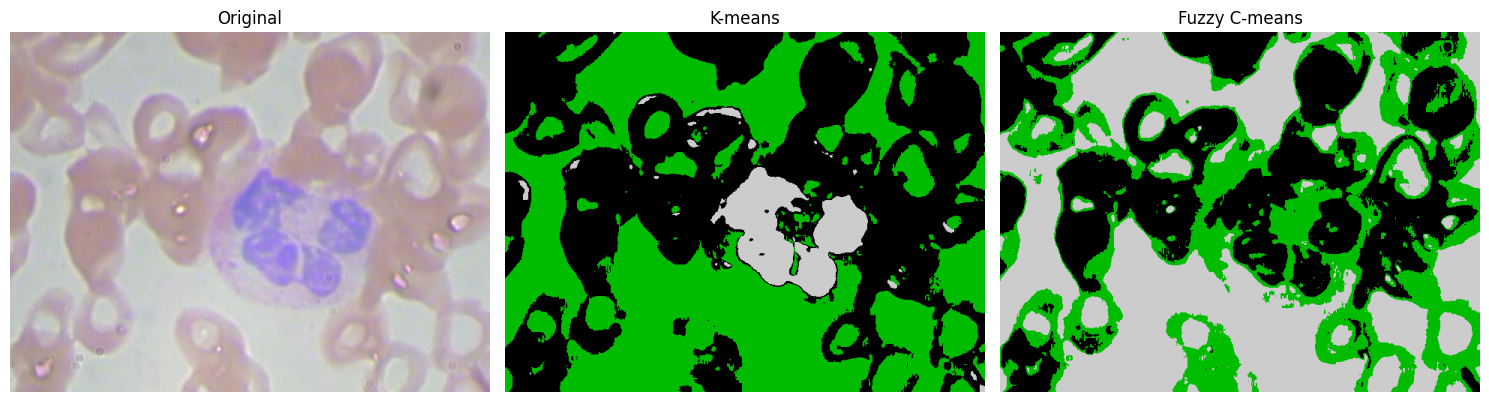

In [8]:
# Visualize first image segmentation
image_path = image_files[0]

img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

pixels = img_lab.reshape((-1, 3)).astype(np.float32)

# KMeans
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(pixels)
kmeans_seg = kmeans_labels.reshape(img.shape[:2])

# FCM
data = pixels.T
cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(
    data,
    c=3,
    m=2,
    error=0.005,
    maxiter=1000,
    init=None
)

fcm_labels = np.argmax(u, axis=0)
fcm_seg = fcm_labels.reshape(img.shape[:2])

# Plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(img_rgb)
axes[0].set_title("Original")

axes[1].imshow(kmeans_seg, cmap="nipy_spectral")
axes[1].set_title("K-means")

axes[2].imshow(fcm_seg, cmap="nipy_spectral")
axes[2].set_title("Fuzzy C-means")

for ax in axes:
    ax.axis("off")

plt.tight_layout()
plt.show()

In [10]:
print("""
KMeans assigns each pixel to exactly one cluster (hard clustering).
FCM assigns soft membership values, allowing smoother region boundaries.
ARI measures similarity between cluster assignments.
""")


KMeans assigns each pixel to exactly one cluster (hard clustering).
FCM assigns soft membership values, allowing smoother region boundaries.
ARI measures similarity between cluster assignments.



In [ ]:
## Conclusion

K-means performs hard clustering, assigning each pixel to a single cluster.

Fuzzy C-means performs soft clustering, allowing pixels to have partial 
membership in multiple clusters.

The Adjusted Rand Index measures similarity between both segmentation results.

FCM generally produces smoother transitions due to soft membership,
while K-means provides sharper cluster boundaries.